In [3]:
import pandas as pd
import numpy as np
import tushare as ts
import QuantLib as ql
import phoenix_rtn3 as pho
from time import time 
from math import log, sqrt, exp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ts.get_k_data('002431',start='2017-11-01',end= '2017-11-08')

,date,open,close,high,low,volume,code
201,2017-11-01,9.85,9.80,9.93,9.78,126168.0,002431
202,2017-11-02,9.80,9.55,9.85,9.54,198676.0,002431
203,2017-11-03,9.60,9.40,9.69,9.30,178380.0,002431
204,2017-11-06,9.41,9.42,9.46,9.27,155262.0,002431
205,2017-11-07,9.43,9.52,9.52,9.30,186725.0,002431
206,2017-11-08,9.50,9.53,9.65,9.46,203850.0,002431


In [6]:
S_1 = 9.80
S_2 = 9.55
S_3 = 9.40
S_4 = 9.42
S_5 = 9.52
S_6 = 9.53
   # 股票或指数初始的价格;
#K = 105        #  行权价格
T = 1.0        #  期权的到期年限(距离到期日时间间隔)
r = 0.035034       #   无风险利率
sigma = 0.25 #0.4589    # 波动率(收益标准差)
M = 170         # number of time steps
dt = T/M       # time enterval
I = 20000       # number of simulation

In [7]:
#np.random.seed(2000)
start = time()
# 生成一个随机变量的数组，M+1行，I列
# 同时计算出没一条路径，每一个时间点的指数水平的增量
# np.cumsum(axis=0)，在列的方向上进行累加得到每一个时间步数上的指数水平
S = S_6 * np.exp(np.cumsum((r - 0.5*sigma **2) *dt +sigma *np.sqrt(dt) *np.random.standard_normal((M+1, I)),axis=0))
S [0] = S_1
S [1] = S_2
S [2] = S_3
S[3]=S_4
S[4]=S_5
S[5]=S_6
end = time()

In [8]:
df = pd.DataFrame(S)
df

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,...,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000
1,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,...,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000
2,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,...,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000
3,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,...,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000
4,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,...,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000
5,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,...,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000
6,9.967480,10.532794,9.803647,9.495676,9.004086,9.680621,9.831359,8.934503,9.117159,9.659191,...,10.141210,8.970984,9.645336,9.842745,8.897997,9.983858,9.632931,9.909364,9.268207,9.483161
7,10.036032,10.611214,9.862526,9.437777,9.307364,9.611060,9.600672,9.251489,9.170855,9.704301,...,10.140637,8.877548,10.016512,9.852873,8.889683,9.911495,9.716732,9.744552,9.146286,9.595671
8,10.119834,10.358018,10.213886,9.676974,9.460156,9.554555,9.421606,8.878566,8.836829,9.683319,...,10.546789,9.288441,10.175459,9.653267,9.043556,10.051478,10.072194,9.737288,9.421182,9.635419
9,10.149156,10.557284,10.049349,9.594682,9.670229,9.805907,9.570363,8.866653,9.118244,9.746484,...,10.339688,9.386221,9.877865,9.943006,8.957613,10.097711,10.017895,9.537635,9.307299,9.801862


In [9]:
dfdays = pd.read_excel('C:/Users/Administrator/Desktop/Work/Projects/Autocall/trade_day.xlsx')
dfdays

,calendarDate
0,2017-11-01
1,2017-11-02
2,2017-11-03
3,2017-11-06
4,2017-11-07
5,2017-11-08
6,2017-11-09
7,2017-11-10
8,2017-11-13
9,2017-11-14


In [10]:
df['date'] = dfdays
df.index = df.date 
df.index = pd.to_datetime(df.index)
df.drop('date',axis=1,inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
date,,,,,,,,,,,,,,,,,,,,,
2017-11-01,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,...,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000
2017-11-02,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,...,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000,9.550000
2017-11-03,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,...,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000,9.400000
2017-11-06,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,...,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000,9.420000
2017-11-07,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,...,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000,9.520000
2017-11-08,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,...,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000
2017-11-09,9.967480,10.532794,9.803647,9.495676,9.004086,9.680621,9.831359,8.934503,9.117159,9.659191,...,10.141210,8.970984,9.645336,9.842745,8.897997,9.983858,9.632931,9.909364,9.268207,9.483161
2017-11-10,10.036032,10.611214,9.862526,9.437777,9.307364,9.611060,9.600672,9.251489,9.170855,9.704301,...,10.140637,8.877548,10.016512,9.852873,8.889683,9.911495,9.716732,9.744552,9.146286,9.595671
2017-11-13,10.119834,10.358018,10.213886,9.676974,9.460156,9.554555,9.421606,8.878566,8.836829,9.683319,...,10.546789,9.288441,10.175459,9.653267,9.043556,10.051478,10.072194,9.737288,9.421182,9.635419


In [11]:
dflist = []
for i in range(len(df.columns)):
    d = pd.DataFrame(df[i])
    d.columns = ['close']
    dflist.append(d)


In [ ]:
rtn =[]
for i in dflist:
    re = pho.phoenix_rtn(i,'2017-11-01',months=6,rtn_rate=0.035333,low_rate=0.77,high_rate=1.07)
    rtn.append(re)
rtn

In [ ]:
sr_rtn

In [ ]:
sr_rtn = pd.Series(rtn)
sr_rtn.mean()

In [37]:
a = dflist[1]
pho.phoenix_rtn(a,'2017-11-01',months=6,rtn_rate=0.035333,low_rate=0.77,high_rate=1.07)

-0.37558962954798508

In [ ]:
-0.06338722821435323

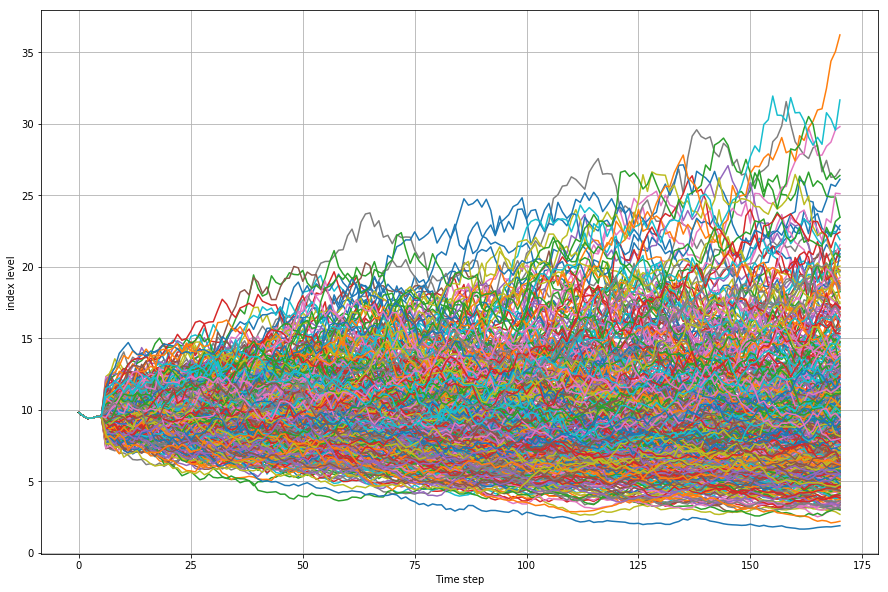

In [32]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel('Time step')
plt.ylabel('index level')
plt.plot(S[:,:500])

获取交易日日历


In [123]:
ts.set_token('4e236c895237ee1b7292cf32d871a151d703faded00a36b6be658755990fb0d7')
mt = ts.Master()
df = mt.TradeCal(exchangeCD='XSHG', beginDate='20171109', endDate='20180715', field='calendarDate,isOpen,prevTradeDate')
df

,calendarDate,isOpen,prevTradeDate
0,2017-11-09,1,2017-11-08
1,2017-11-10,1,2017-11-09
2,2017-11-11,0,2017-11-10
3,2017-11-12,0,2017-11-10
4,2017-11-13,1,2017-11-10
5,2017-11-14,1,2017-11-13
6,2017-11-15,1,2017-11-14
7,2017-11-16,1,2017-11-15
8,2017-11-17,1,2017-11-16
9,2017-11-18,0,2017-11-17


In [124]:
df = df[df.isOpen ==1]
sr1 = df.calendarDate
sr1

0      2017-11-09
1      2017-11-10
4      2017-11-13
5      2017-11-14
6      2017-11-15
7      2017-11-16
8      2017-11-17
11     2017-11-20
12     2017-11-21
13     2017-11-22
14     2017-11-23
15     2017-11-24
18     2017-11-27
19     2017-11-28
20     2017-11-29
21     2017-11-30
22     2017-12-01
25     2017-12-04
26     2017-12-05
27     2017-12-06
28     2017-12-07
29     2017-12-08
32     2017-12-11
33     2017-12-12
34     2017-12-13
35     2017-12-14
36     2017-12-15
39     2017-12-18
40     2017-12-19
41     2017-12-20
          ...    
204    2018-06-01
207    2018-06-04
208    2018-06-05
209    2018-06-06
210    2018-06-07
211    2018-06-08
214    2018-06-11
215    2018-06-12
216    2018-06-13
217    2018-06-14
218    2018-06-15
222    2018-06-19
223    2018-06-20
224    2018-06-21
225    2018-06-22
228    2018-06-25
229    2018-06-26
230    2018-06-27
231    2018-06-28
232    2018-06-29
235    2018-07-02
236    2018-07-03
237    2018-07-04
238    2018-07-05
239    201

In [125]:
sr1.to_excel('trade_day.xlsx')